## importing Libraries

In [26]:
!pip install pyenchant
!apt-get install libenchant1c2a -y

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [27]:
pip install kaleido==0.1.0post1

Note: you may need to restart the kernel to use updated packages.


In [28]:
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [29]:

import numpy as np # for using array 
import pandas as pd # making the data frames
import matplotlib.pyplot as plt #plotting graphs
import seaborn as sns #plotting graphs
import random  
from sklearn.utils import shuffle # shuffling the data
import nltk # dealing with strings
nltk.download('stopwords')
import re
from wordcloud import WordCloud #visualizing word cloud(bag of words)
%matplotlib inline 
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hmyeh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### the data we will train our model on is devided into Fake And true 
     so we will read each file in data frame

In [30]:
#loading data
fake_data=pd.read_csv(r"C:\Users\hmyeh\Downloads\ApplAI\Fake News Detection\Fake.csv")
true_data=pd.read_csv(r"C:\Users\hmyeh\Downloads\ApplAI\Fake News Detection\True.csv")

In [31]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


here, we see that the dataset isnt labled so, we will add column label before concatinating true and fake news

In [32]:
#adding fake label
fake_data['news status']= 'Fake'

In [33]:
fake_data.head() #exploring the dataset

,title,text,subject,date,news status
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Fake


In [34]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


##### later on we will concat the true and fake data together so we must label them first

In [35]:
#adding true label
true_data['news status']='True' 

In [36]:
true_data.head()

,title,text,subject,date,news status
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


##### quick view on our values

In [37]:
true_data['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [38]:
fake_data['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

##### our data shape

In [39]:
fake_data.shape

(23481, 5)

In [40]:
true_data.shape

(21417, 5)

## data analysis
    in the below plots we will try to extract some information from the dataset and understand it well to be able to take
    right decisons later on with the features we will deal with

<AxesSubplot:xlabel='subject', ylabel='count'>

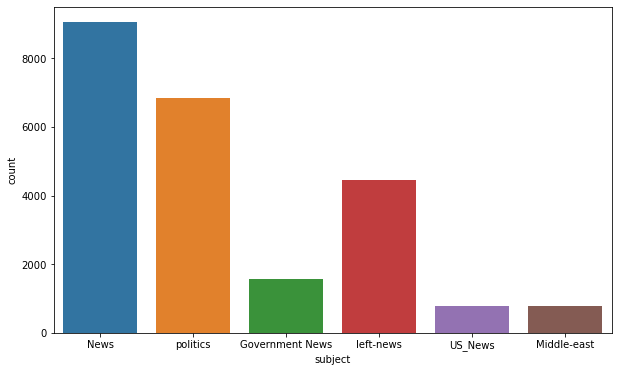

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake_data) #plotting the diffrent subjects in fake data

##### most of our data subjects are politics news 

<AxesSubplot:xlabel='subject', ylabel='count'>

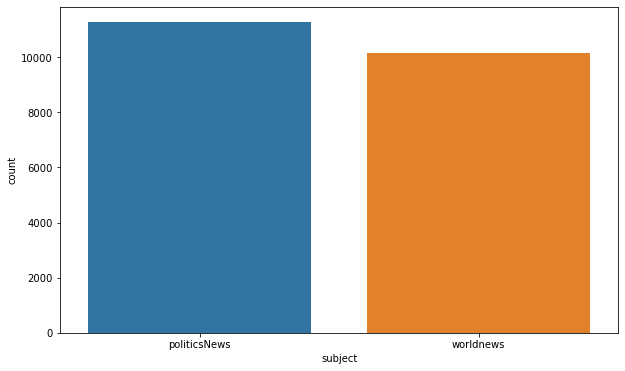

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=true_data) #plotting the diffrent subjects in true data

In [43]:
def count_twitters_user(df):
    twitter_username_re = re.compile(r'@([A-Za-z0-9_]+)')
    count = 0
    list_ = []
    for text in df['text']:
        count += len(re.findall(twitter_username_re, text))
    return count

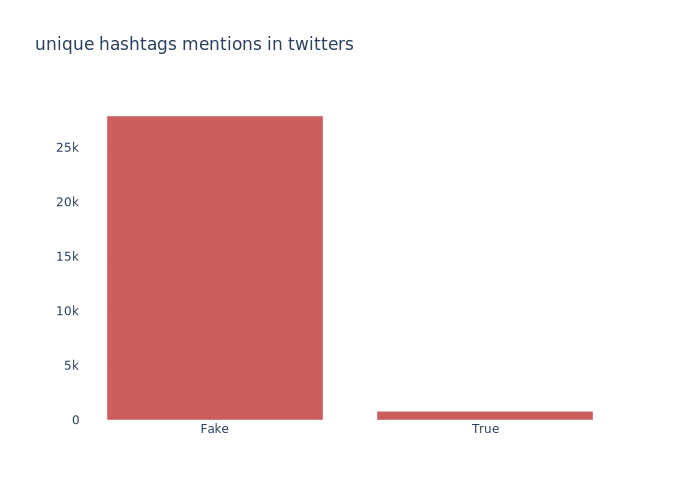

In [44]:
configure_plotly_browser_state()
import plotly.express as px
import plotly.graph_objects as go

twitter_users_fake_count = count_twitters_user(fake_data)
twitter_users_true_count = count_twitters_user(true_data)
fig = go.Figure()
fig.add_trace(go.Bar(x=['Fake', 'True'],
    y=[twitter_users_fake_count, twitter_users_true_count],
    name='Twitter user name Pattern',
    marker_color='indianred')
)
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'title': 'unique hashtags mentions in twitters',
})
fig.show("svg")

it's clear that most of Fake data are from tweets which may make sense bacause twitter as any other social netwoek can be stuffed with rumors and fake news

In [45]:
from tqdm import tqdm
def text_size(df):
    sizes = []
    for text in tqdm(df['text']):
        len_ = len(text.split())
        sizes.append(len_)
    return np.array(sizes)
fake_size = text_size(fake_data)
true_size = text_size(true_data)
fake_data['len'] = fake_size
true_data['len'] = true_size

100%|█████████████████████████████████████████████████████████████████████████| 21417/21417 [00:00<00:00, 46457.73it/s]


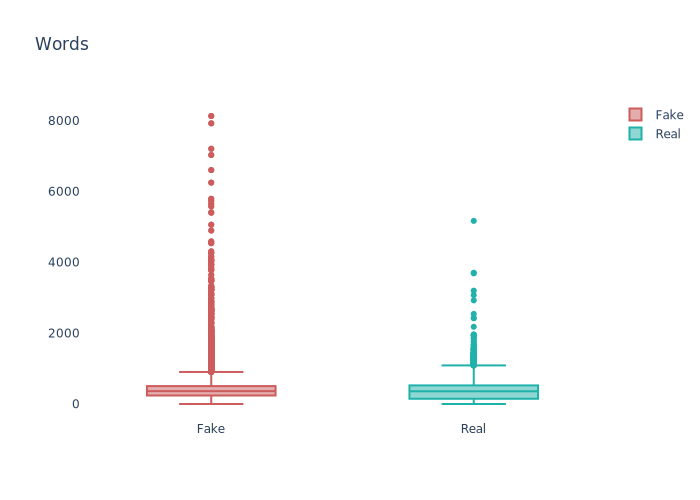

In [46]:
configure_plotly_browser_state()
fig = go.Figure()
fig.add_trace(go.Box(y=list(fake_data['len']), name='Fake',
                marker_color = 'indianred'))
fig.add_trace(go.Box(y=list(true_data['len']), name = 'Real',
                marker_color = 'lightseagreen'))

fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
        'title': 'Words',
})
fig.show("svg")

- Fake news in general has a lot more tokens than real ones, which is kind of weird assuming real news has a tendency to bring details about events to inform the reader, however as noted the fact that fakes news is a mix of twitters and news this may justify the fact that they have more words.


In [47]:
from tqdm import tqdm
def unique_tokens(df):
    unique_tokens = set()
    for text in tqdm(df['text']):
        splited = text.split()
        for token in splited:
            unique_tokens.add(token)
    return unique_tokens

unique_tokens_fake = unique_tokens(fake_data)
unique_tokens_true = unique_tokens(true_data)

100%|█████████████████████████████████████████████████████████████████████████| 21417/21417 [00:01<00:00, 14135.69it/s]


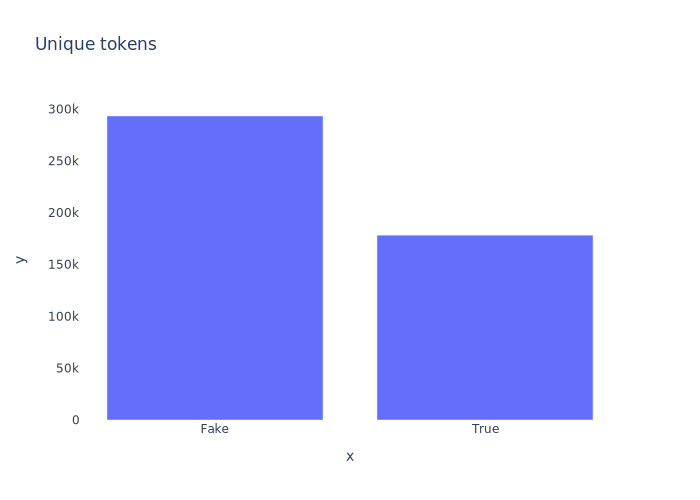

In [48]:
configure_plotly_browser_state()
fig = px.bar(y=[len(unique_tokens_fake), len(unique_tokens_true)], x=['Fake', 'True'], title='Unique tokens')
fig.update_layout({
        'plot_bgcolor': 'rgba(0, 0, 0, 0)',
        'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show("svg")

- Fake news has a lot more different tokens than the real ones, this is expected assuming that inside the fake there are twitters where people use, abbreviations , slang word and language addictions in non-formal writing.


- I believe it is interesting to observe the occurrence of words that do not exist in the English language to see the difference between true and false news.

In [49]:
import enchant
def check_if_exist(list_):
    d = enchant.DictWithPWL("en_US", "vocab.txt")
    count = 0
    for token in tqdm(list_):
        if not d.check(token) and not d.check(token.capitalize()):
            count+=1
    return count
count_fake = check_if_exist(unique_tokens_fake)
count_true = check_if_exist(unique_tokens_true)

100%|████████████████████████████████████████████████████████████████████████| 178503/178503 [01:01<00:00, 2910.74it/s]


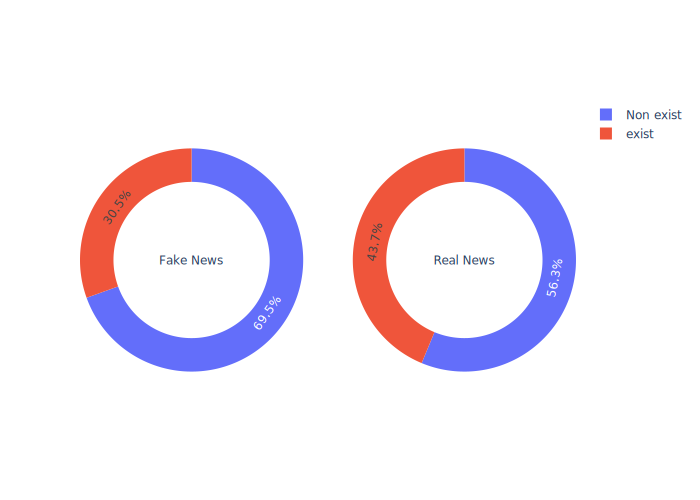

In [50]:
configure_plotly_browser_state()

from plotly.subplots import make_subplots


fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.append_trace(go.Pie(values=[count_fake, len(unique_tokens_fake)-count_fake], 
                        labels=['Non exist', 'exist'], hole=.7, 
                        title='Fake News'), row=1, col=1)

fig.append_trace(go.Pie(values=[count_true, len(unique_tokens_true)-count_true], 
                        labels=['Non exist', 'exist'], hole=.7, 
                        title='Real News'), row=1, col=2)
fig.show("svg")


- Here we observed that the Fake news is more likely to have typping errors or words that doesn't have meaning which i see it makes sense as the Fake news is not from a known publisher and is not reviewed before publishing as the true ones
- but even the value in the real news has very much non understandble words but the reason may be we need to pre process the text so lets do so and try again

In [51]:
import nltk
import re
tqdm.pandas()
def preprocess(df):
    stopwords = nltk.corpus.stopwords.words('english')
    df['text_pre'] = df['text']
    df['text_pre'] = df['text_pre'].progress_apply(lambda x : x.lower())
    df['text_pre'] = df['text_pre'].progress_apply(lambda x : x.split(" "))
    df['text_pre'] = df['text_pre'].progress_apply(lambda x : [item for item in x if item not in stopwords])
    df['text_pre'] = df['text_pre'].progress_apply(lambda x : " ".join(x))
#    df['text_pre'] = df['text_pre'].str.replace('@[^\s]+', "")
    df['text_pre'] = df['text_pre'].str.replace('https?:\/\/.*[\r\n]*', '')
    df['text_pre'] = df['text_pre'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
    df['text_pre'] = df['text_pre'].str.replace('\d+', '')
    df['text_pre'] = df['text_pre'].str.replace('[^\w\s]', '')
    return df

fake = preprocess(fake_data)
true = preprocess(true_data)


100%|█████████████████████████████████████████████████████████████████████████| 21417/21417 [00:00<00:00, 95241.51it/s]


In [52]:
def unique_tokens2(df):
    unique_tokens = set()
    for text in tqdm(df['text_pre']):
        splited = text.split()
        for token in splited:
            unique_tokens.add(token)
    return unique_tokens

unique_tokens_fake2 = unique_tokens2(fake)
unique_tokens_true2 = unique_tokens2(true)

count_fake = check_if_exist(unique_tokens_fake2)
count_true = check_if_exist(unique_tokens_true2)

100%|██████████████████████████████████████████████████████████████████████████| 78044/78044 [00:24<00:00, 3158.45it/s]


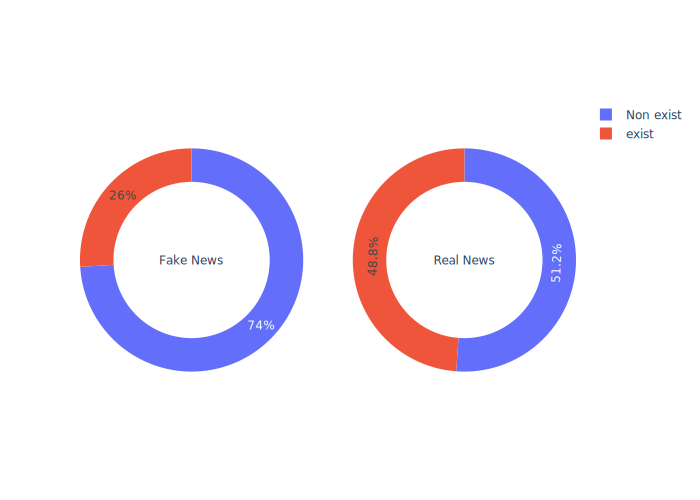

In [54]:

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.append_trace(go.Pie(values=[count_fake, len(unique_tokens_fake2)-count_fake], 
                        labels=['Non exist', 'exist'], hole=.7, 
                        title='Fake News'), row=1, col=1)

fig.append_trace(go.Pie(values=[count_true, len(unique_tokens_true2)-count_true], 
                        labels=['Non exist', 'exist'], hole=.7, 
                        title='Real News'), row=1, col=2)
fig.show("svg")

#configure_plotly_browser_state()

- well it increased after the pre processing

### Word Clouds


#### word clouds simply show which words was found more frequently in the data set

In [55]:
text=' '.join(fake_data['text'].tolist()) #

<function matplotlib.pyplot.show(close=None, block=None)>

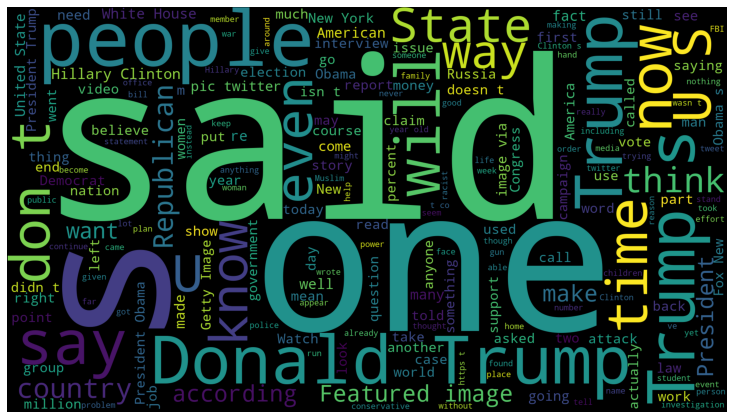

In [56]:
wordcloud=WordCloud(width=1920,height=1080).generate(text) 
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

<AxesSubplot:xlabel='subject', ylabel='count'>

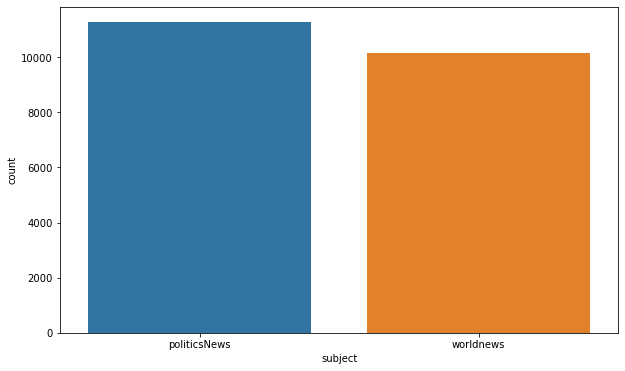

In [57]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=true_data)

In [58]:
Rtext=' '.join(true_data['text'].tolist())

<function matplotlib.pyplot.show(close=None, block=None)>

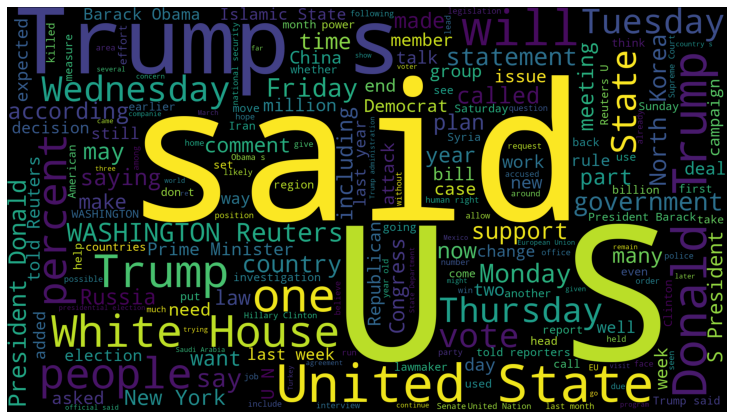

In [59]:
wordcloud=WordCloud(width=1920,height=1080).generate(Rtext) 
fig=plt.figure(figsize=(10,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

In [60]:
true_data.head()

,title,text,subject,date,news status,len,text_pre
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,749,washington reuters head conservative republic...
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,624,washington reuters transgender people allowed...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,457,washington reuters special counsel investigat...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,376,washington reuters trump campaign adviser geo...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,852,seattlewashington reuters president donald tr...


## text diffrences
there is a important information we can can conclude from the diffrence of real and fake texts

Real news seems to have source of publication which is not present in fake news data as example:

- "WASHINGTON(Reuters)"
- only few texts in real data dont have publication info



In [61]:
unknown_publishers = []    #svaing the indexes of records without any publisher like (WASHINGTON Reuters)
for index,row in enumerate(true_data.text.values):
    try:
        record = row.split(' - ',maxsplit=1)
        record[1]
        assert(len(record[0])<120)
    except:
        unknown_publishers.append(index)

In [62]:
len(unknown_publishers) # number of rows

229

##### here we want to remove the publisher from the text of the true data to make sure the model is mostly affected by how the text is written not only with the publisher 

In [63]:
publisher=[]    
tmptxt=[]
for index ,row in enumerate(true_data.text.values):   #returning row and index in each loop
    if index in unknown_publishers:
        tmptxt.append(row)     
        publisher.append("unknown")
    else:   
        record = row.split('-',maxsplit=1)   #splitting by "-" to split the text from the publishers
        publisher.append(record[0].strip())  #appending the publisher to publishers array
        tmptxt.append(record[1].strip())     # saving the text without the publisher

In [64]:
#true_data['publisher']=publisher
true_data['text']=tmptxt

In [65]:
true_data.head(20)

,title,text,subject,date,news status,len,text_pre
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",True,749,washington reuters head conservative republic...
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",True,624,washington reuters transgender people allowed...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",True,457,washington reuters special counsel investigat...
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",True,376,washington reuters trump campaign adviser geo...
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",True,852,seattlewashington reuters president donald tr...
5,"White House, Congress prepare for talks on spe...",The White House said on Friday it was set to k...,politicsNews,"December 29, 2017",True,599,west palm beach flawashington reuters white h...
6,"Trump says Russia probe will be fair, but time...",President Donald Trump said on Thursday he bel...,politicsNews,"December 29, 2017",True,538,west palm beach fla reuters president donald ...
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",True,135,following statements were posted verified twit...
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",True,100,following statements were posted verified twit...
9,Alabama official to certify Senator-elect Jone...,Alabama Secretary of State John Merrill said h...,politicsNews,"December 28, 2017",True,67,washington reuters alabama secretary state jo...


In [66]:
true_data['text'] = true_data['title']+ " " +true_data['text']      #merging title and text because we will work on one coloumn with the classififcation 
fake_data['text'] = fake_data['title']+ " " +fake_data['text']  

In [67]:
true_data['text'] = true_data['text'].apply(lambda x: str(x).lower())  #making all texts lowercase
fake_data['text'] = fake_data['text'].apply(lambda x: str(x).lower()) 

#### now it is time to merge the data

In [68]:
data = pd.concat([fake_data,true_data], axis=0)

In [69]:
data['news status'].unique() #checking the labels

array(['Fake', 'True'], dtype=object)

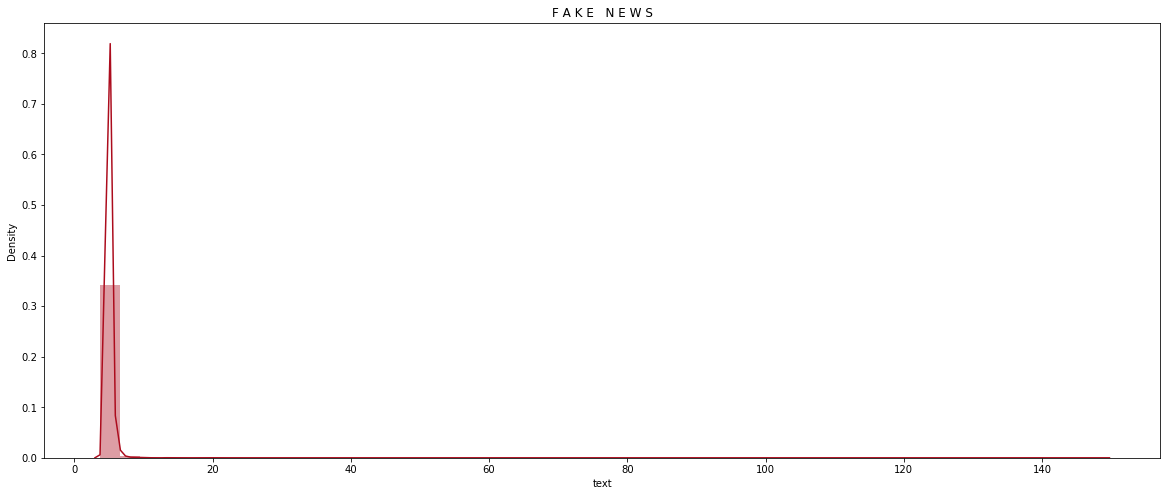

In [70]:
#average word length in fake news

fig, ax = plt.subplots(figsize = (20, 8))
text_words = data[data["news status"] == "Fake"]["text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#AC0C1D", ax = ax).set_title("F A K E   N E W S");

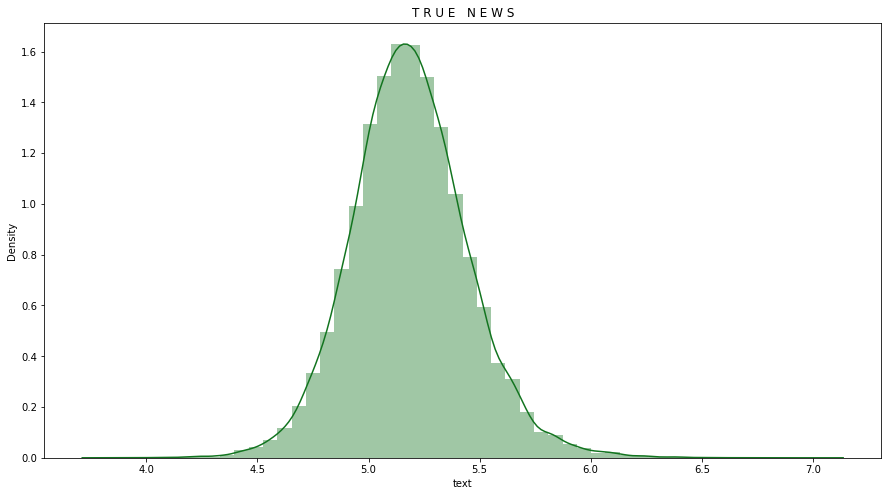

In [71]:
#average word length in true news

fig,ax = plt.subplots(figsize = (15, 8))
text_words = data[data["news status"] == "True"]["text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#12741F", ax = ax).set_title("T R U E   N E W S");

In [72]:
data['text']=data['title']+''+data['text']

##### in the following few cells our target will be to change the date which is written as a string in the data  to fixed form in order to make analysis on it

In [73]:
# extract the month
x='June 28, 2016'
re.split('\s',x,1)#[0]

['June', '28, 2016']

In [74]:
data['month']=data['date'].apply(lambda x:re.split('\s',x,1)[0])

In [75]:
# extract the day
x='June 28, 2016'
re.search('\d{2}',x).group()

'28'

In [76]:
# df['day']=df['date'].apply(lambda x:re.search('\d{2}',x).group())
# it does not work because some dates do not have a day
def _day_(x):
    try:
        value=re.search('\d{2}',x).group()
    except:
        value= data['day']=np.nan
    return value
data['day']=data['date'].apply(_day_)

In [77]:
# extract the year
x='June 28, 2016'
re.search('\d{4}',x).group()

'2016'

In [78]:
#df['year']=df['date'].apply(lambda x:re.search('\d{4}',x).group())
#it does not work because some dates do not have a year
def _year_(x):
    try:
        value=re.search('\d{4}',x).group()
    except:
        value= data['year']=np.nan
    return value
data['year']=data['date'].apply(_year_)

In [79]:
# number of null values in each column
data.isnull().sum()

title           0
text            0
subject         0
date            0
news status     0
len             0
text_pre        0
month           0
day             1
year           39
dtype: int64

In [80]:
data.dropna(inplace=True) #dropping nulls 

In [81]:
data.month.unique() #checking what values we have in month after the splitting

array(['December', 'November', 'October', 'September', 'August', 'July',
       'June', 'May', 'April', 'March', 'February', 'January', 'Dec',
       'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'Apr', 'Mar', 'Feb',
       'Jan',
       'https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg',
       'https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg'],
      dtype=object)

##### we found unexpected value for month,lets deal with it

In [82]:
data[data['month']=='https://fedup.wpengine.com/wp-content/uploads/2015/04/hillarystreetart.jpg']

,title,text,subject,date,news status,len,text_pre,month,day,year
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,Fake,1,,https://fedup.wpengine.com/wp-content/uploads/...,20,2015
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,Fake,1,,https://fedup.wpengine.com/wp-content/uploads/...,20,2015
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,Fake,1,,https://fedup.wpengine.com/wp-content/uploads/...,20,2015


In [83]:
# drop rows 
data.drop([15839,17432,21869],axis=0,inplace=True)

In [84]:
data[data['month']=='https://fedup.wpengine.com/wp-content/uploads/2015/04/entitled.jpg']

,title,text,subject,date,news status,len,text_pre,month,day,year
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,Fake,1,,https://fedup.wpengine.com/wp-content/uploads/...,20,2015
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,Fake,1,,https://fedup.wpengine.com/wp-content/uploads/...,20,2015
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,Fake,1,,https://fedup.wpengine.com/wp-content/uploads/...,20,2015


In [85]:
# drop rows 
data.drop([15840,17433,21870],axis=0,inplace=True)

##### now lets check again

In [86]:
data.month.unique()

array(['December', 'November', 'October', 'September', 'August', 'July',
       'June', 'May', 'April', 'March', 'February', 'January', 'Dec',
       'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'Apr', 'Mar', 'Feb',
       'Jan'], dtype=object)

##### all good lets move on

In [87]:
mon = {'January':'01',    #changing the months from letters to their corresponding nums
        'February':'02',
        'March':'03',
        'April':'04',
        'May':'05',
        'June':'06',
        'July':'07',
        'August':'08',
        'September':'09',
        'October':'10',
        'November':'11',
        'December':'12',
        'Jan':'01',
        'Feb':'02',
        'Mar':'03',
        'Apr':'04',
        'Jun':'06',
        'Jul':'07',
        'Aug':'08',
        'Sep':'09',
        'Oct':'10',
        'Nov':'11',
        'Dec':'12'}
data['month']=data['month'].map(mon)

In [88]:
data.month.unique()

array(['12', '11', '10', '09', '08', '07', '06', '05', '04', '03', '02',
       '01'], dtype=object)

In [89]:
# now create a new date column clearly
data['new_date']=data['year']+'-'+data['month']+'-'+data['day']

In [90]:
data.head()

,title,text,subject,date,news status,len,text_pre,month,day,year,new_date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump Sends Out Embarrassing New Year’...,News,"December 31, 2017",Fake,495,donald trump wish americans happy new year lea...,12,31,2017,2017-12-31
1,Drunk Bragging Trump Staffer Started Russian ...,Drunk Bragging Trump Staffer Started Russian ...,News,"December 31, 2017",Fake,305,house intelligence committee chairman devin nu...,12,31,2017,2017-12-31
2,Sheriff David Clarke Becomes An Internet Joke...,Sheriff David Clarke Becomes An Internet Joke...,News,"December 30, 2017",Fake,580,friday revealed former milwaukee sheriff david...,12,30,2017,2017-12-30
3,Trump Is So Obsessed He Even Has Obama’s Name...,Trump Is So Obsessed He Even Has Obama’s Name...,News,"December 29, 2017",Fake,444,christmas day donald trump announced would ba...,12,29,2017,2017-12-29
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis Just Called Out Donald Trump Dur...,News,"December 25, 2017",Fake,420,pope francis used annual christmas day message...,12,25,2017,2017-12-25


In [91]:
# now I can convert to date time
data['new_date']=pd.to_datetime(data['new_date'])

In [92]:
# drop columns 'date','day','month','year'
data.drop(columns=['date','day','month','year'],inplace=True)

##### now the news data is ready to be plotted over the months

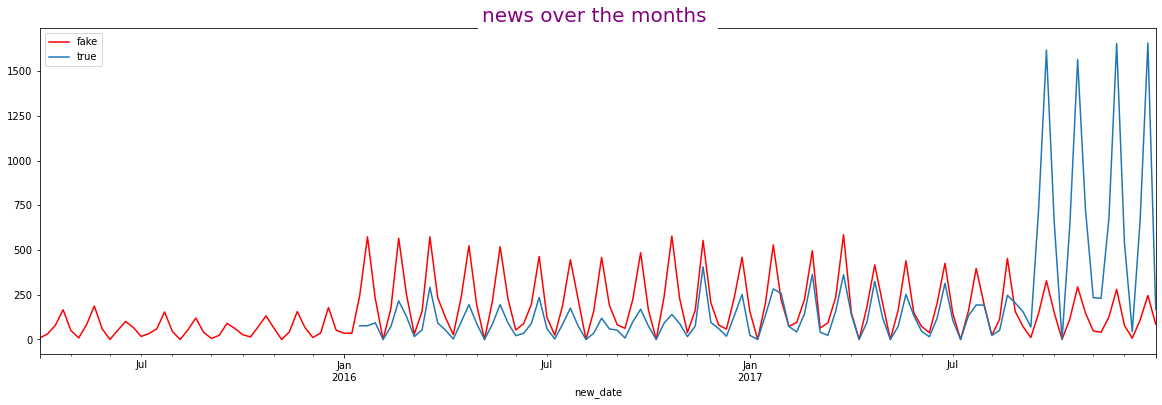

In [93]:
plt.figure(figsize=(20,6))
data[data['news status']=='Fake'].groupby([pd.Grouper(key='new_date', freq='W')])['news status'].count().plot(kind='line',label='fake',c='red')
data[data['news status']=='True'].groupby([pd.Grouper(key='new_date', freq='W')])['news status'].count().plot(kind='line',label='true')
plt.title("news over the months ",
          fontsize='20',
          backgroundcolor='white',
          color='Purple')
plt.legend();

##### in the previous plot we are able to see that the graph is continious because we nearly have a news in every day from this giving interval